In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset  = pd.read_csv('predictive_maintenance.csv')

In [3]:
dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
dataset.shape

(10000, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Data Preprocessing
The UDI and Product ID column is not needed as it doesnt carry any useful information

In [6]:
dataset = dataset.drop(['UDI','Product ID'], axis=1)

In [7]:
dataset.head(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure


In [8]:
dataset['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [9]:
dataset['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [10]:
dataset.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

# EDA
EDA is a crucial step in data analysis where you explore and analyze the dataset to gain insights, identify patterns, and understand the underlying structure of the data.

In [15]:
dataset.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [11]:
dataset.groupby(['Target', 'Failure Type']).count().drop(['Air temperature [K]', 
                                                          'Process temperature [K]', 
                                                          'Rotational speed [rpm]', 
                                                          'Torque [Nm]', 
                                                          'Tool wear [min]'], axis=1).rename(columns={'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

In [12]:
dataset.groupby(['Target', 'Failure Type']).median()

Air temperature [K]  Process temperature [K]  \
Target Failure Type                                                             
0      No Failure                             300.00                    310.0   
       Random Failures                        300.75                    311.1   
1      Heat Dissipation Failure               302.45                    310.7   
       No Failure                             300.50                    309.9   
       Overstrain Failure                     299.45                    310.1   
       Power Failure                          300.40                    310.2   
       Tool Wear Failure                      300.40                    310.3   

                                 Rotational speed [rpm]  Torque [Nm]  \
Target Failure Type                                                    
0      No Failure                                1507.0        39.80   
       Random Failures                           1490.0        44.60   
1      Heat Dissipation Failure                  1346.0        52.35   
       No Failure                                1438.0        45.20   
       Overstrain Failure                        1362.5        56.75   
       Power Failure                             1386.0        63.60   
       Tool Wear Failure                         1521.0        37.70   

                                 Tool wear [min]  
Target Failure Type                               
0      No Failure                          107.0  
       Random Failures                     142.0  
1      Heat Dissipation Failure            106.0  
       No Failure                          119.0  
       Overstrain Failure                  207.0  
       Power Failure                       100.0  
       Tool Wear Failure                   215.0

In [13]:
dataset.groupby(['Type','Target']).median()

Air temperature [K]  Process temperature [K]  \
Type Target                                                 
H    0                     299.7                    309.9   
     1                     302.0                    310.2   
L    0                     300.1                    310.1   
     1                     301.2                    310.4   
M    0                     300.1                    310.0   
     1                     302.0                    310.6   

             Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Type Target                                                        
H    0                       1502.0         40.2            106.0  
     1                       1371.0         53.8            147.0  
L    0                       1508.0         39.7            107.0  
     1                       1362.0         53.9            182.0  
M    0                       1506.0         40.0            105.0  
     1                       1372.0         51.6            125.0

# Data Visualization

<AxesSubplot:xlabel='Target', ylabel='count'>

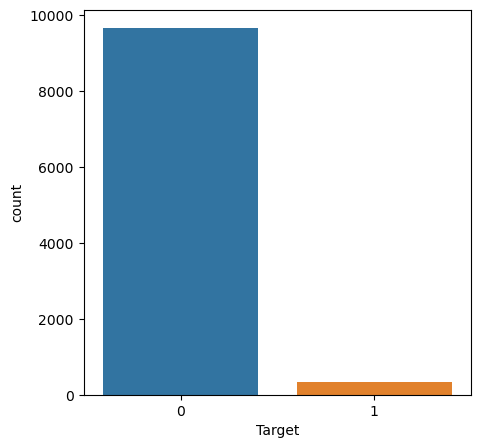

In [52]:
plt.figure(figsize=(5,5))
sns.countplot(data=dataset,x="Target")

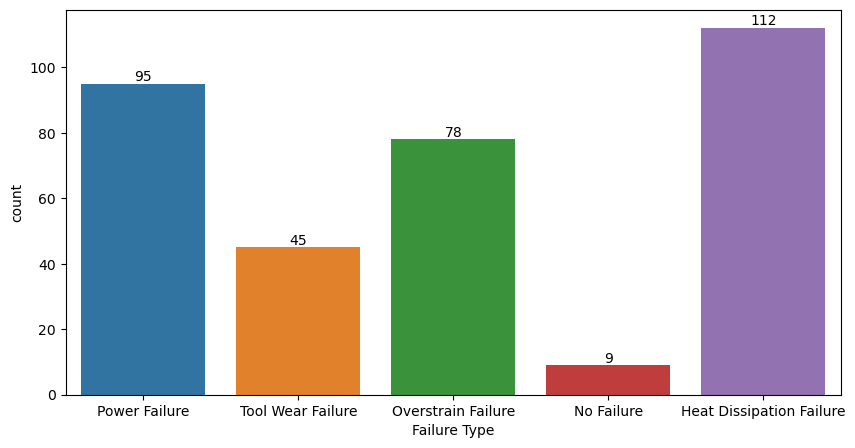

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset[dataset['Target']==1],x="Failure Type")

# Add count values to the plot
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

plt.show()

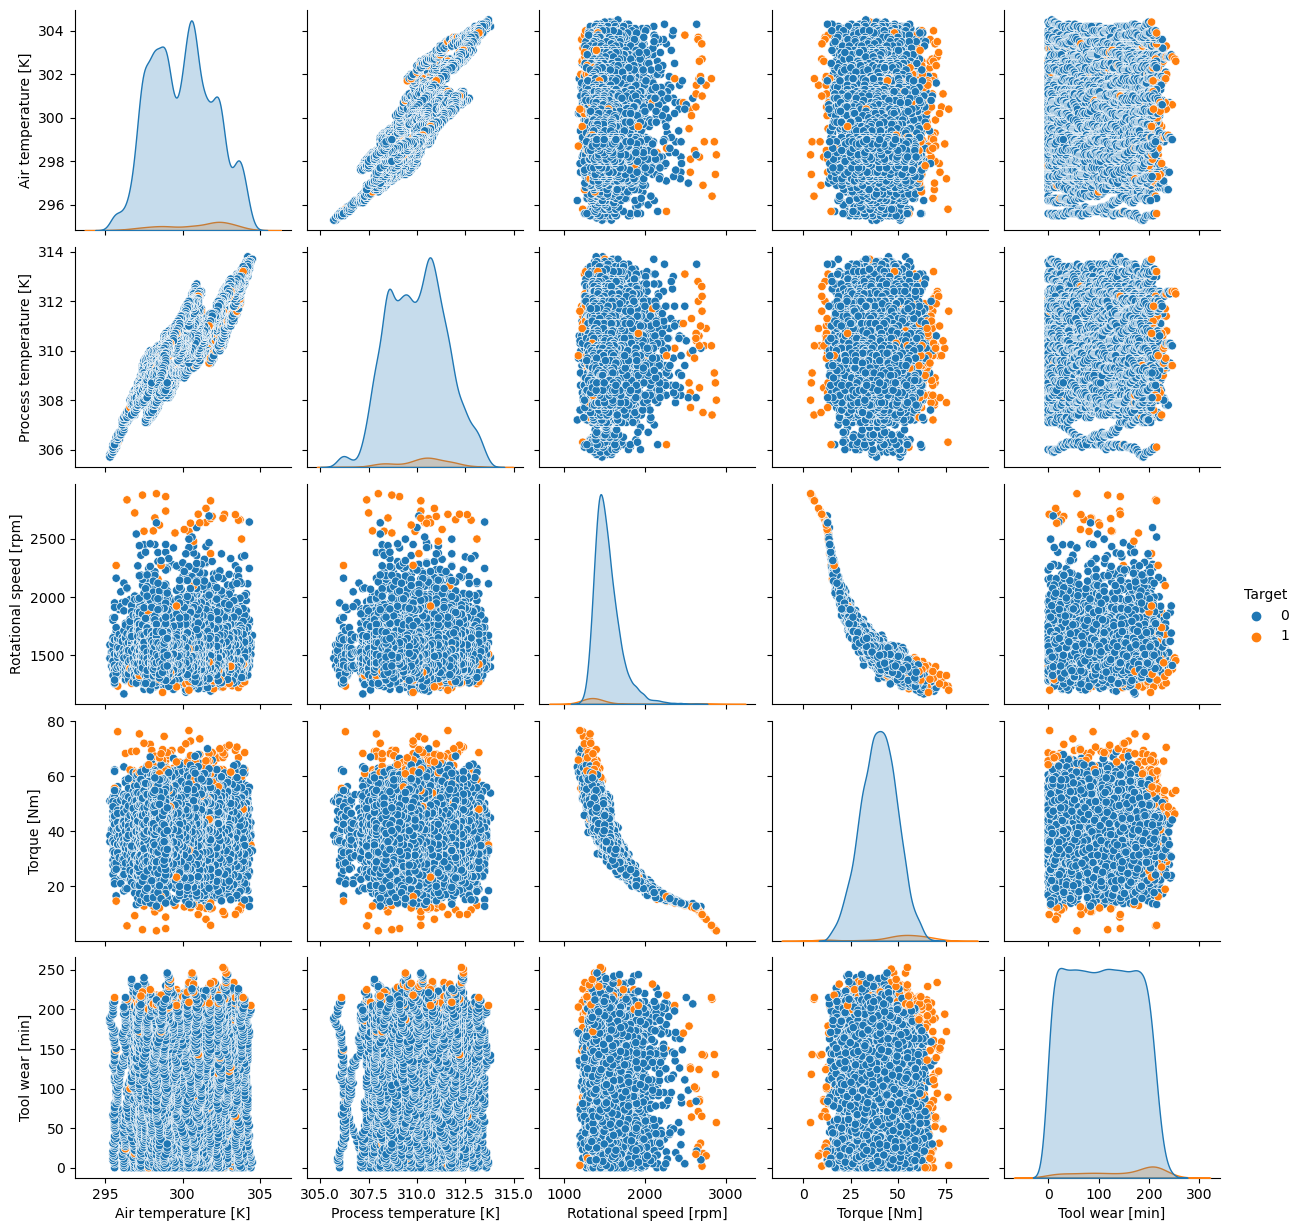

In [66]:
sns.pairplot(dataset,hue='Target')

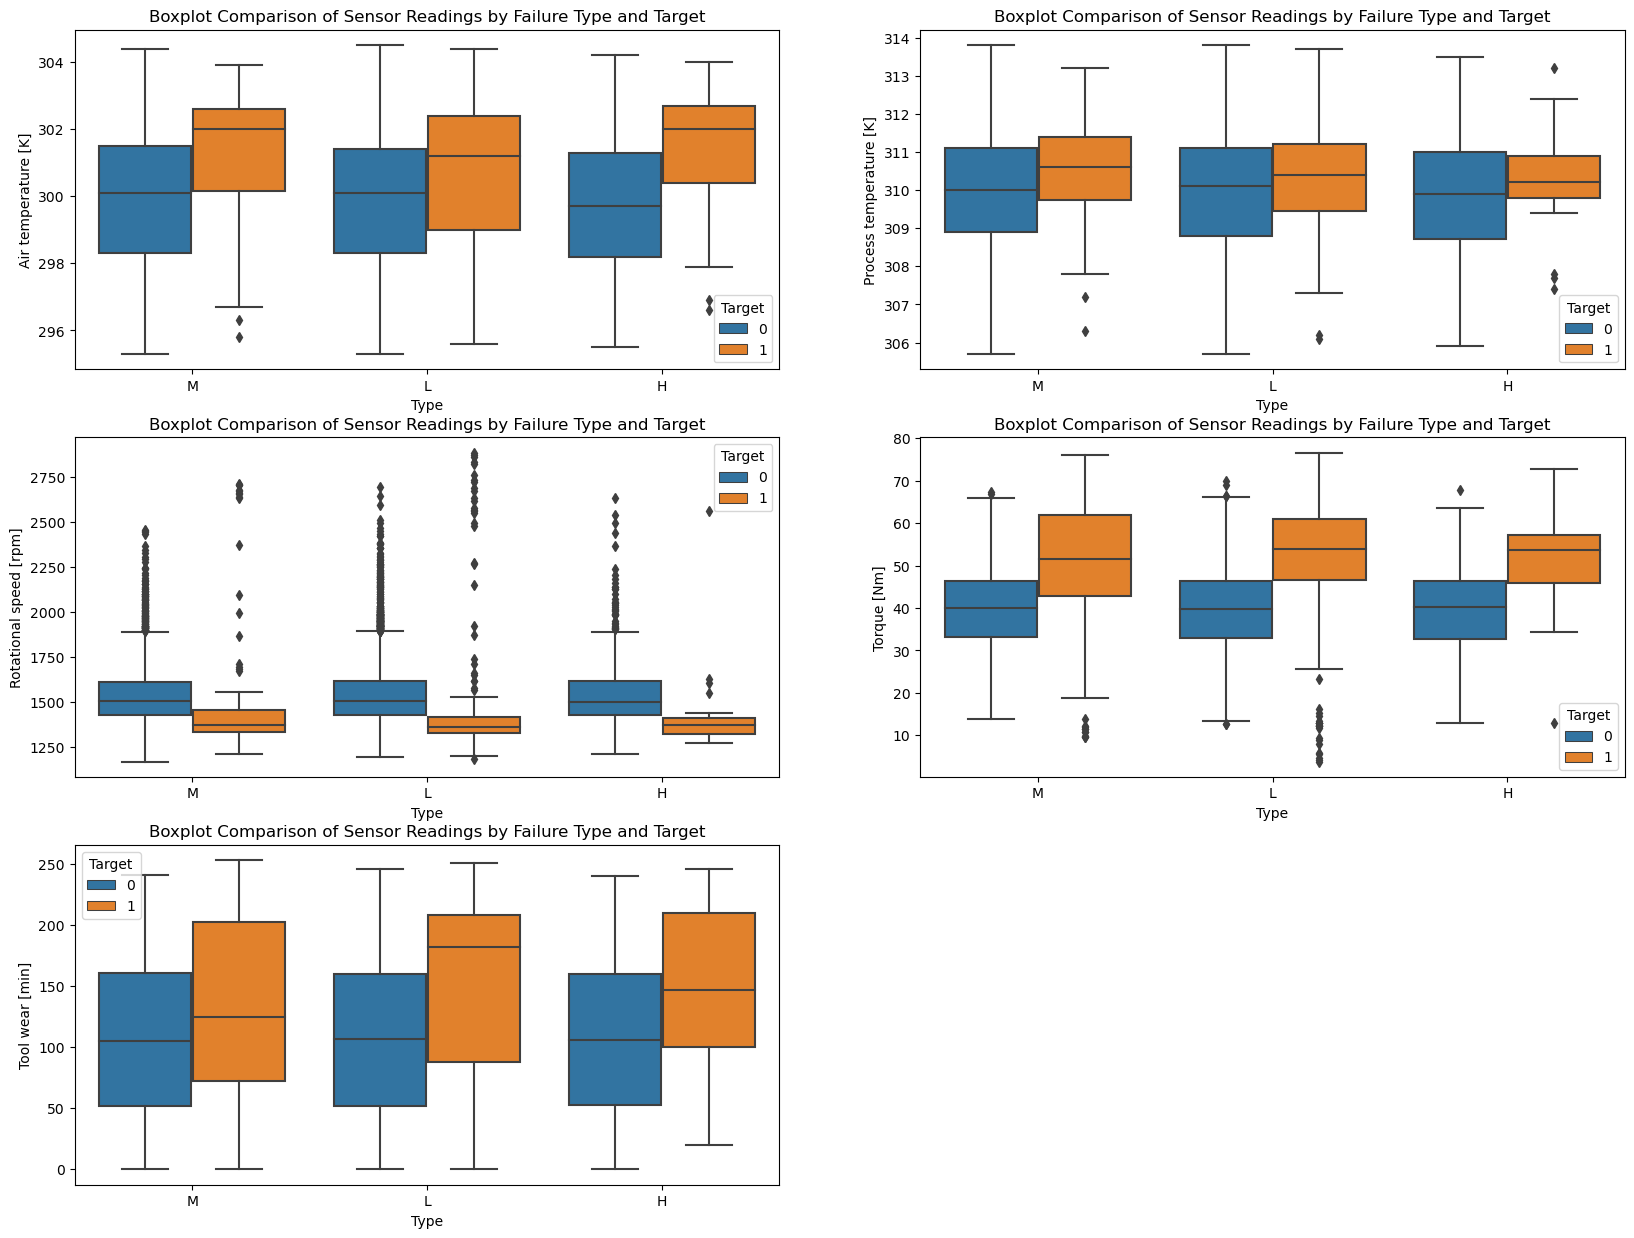

In [71]:
plt.figure(figsize = (20,15))
lst = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
m=1
for i in lst :
    plt.subplot(3,2,m)
    plt.title("Boxplot Comparison of Sensor Readings by Failure Type and Target")
    sns.boxplot(data=dataset,y=i,x="Type",hue="Target")
    m+=1


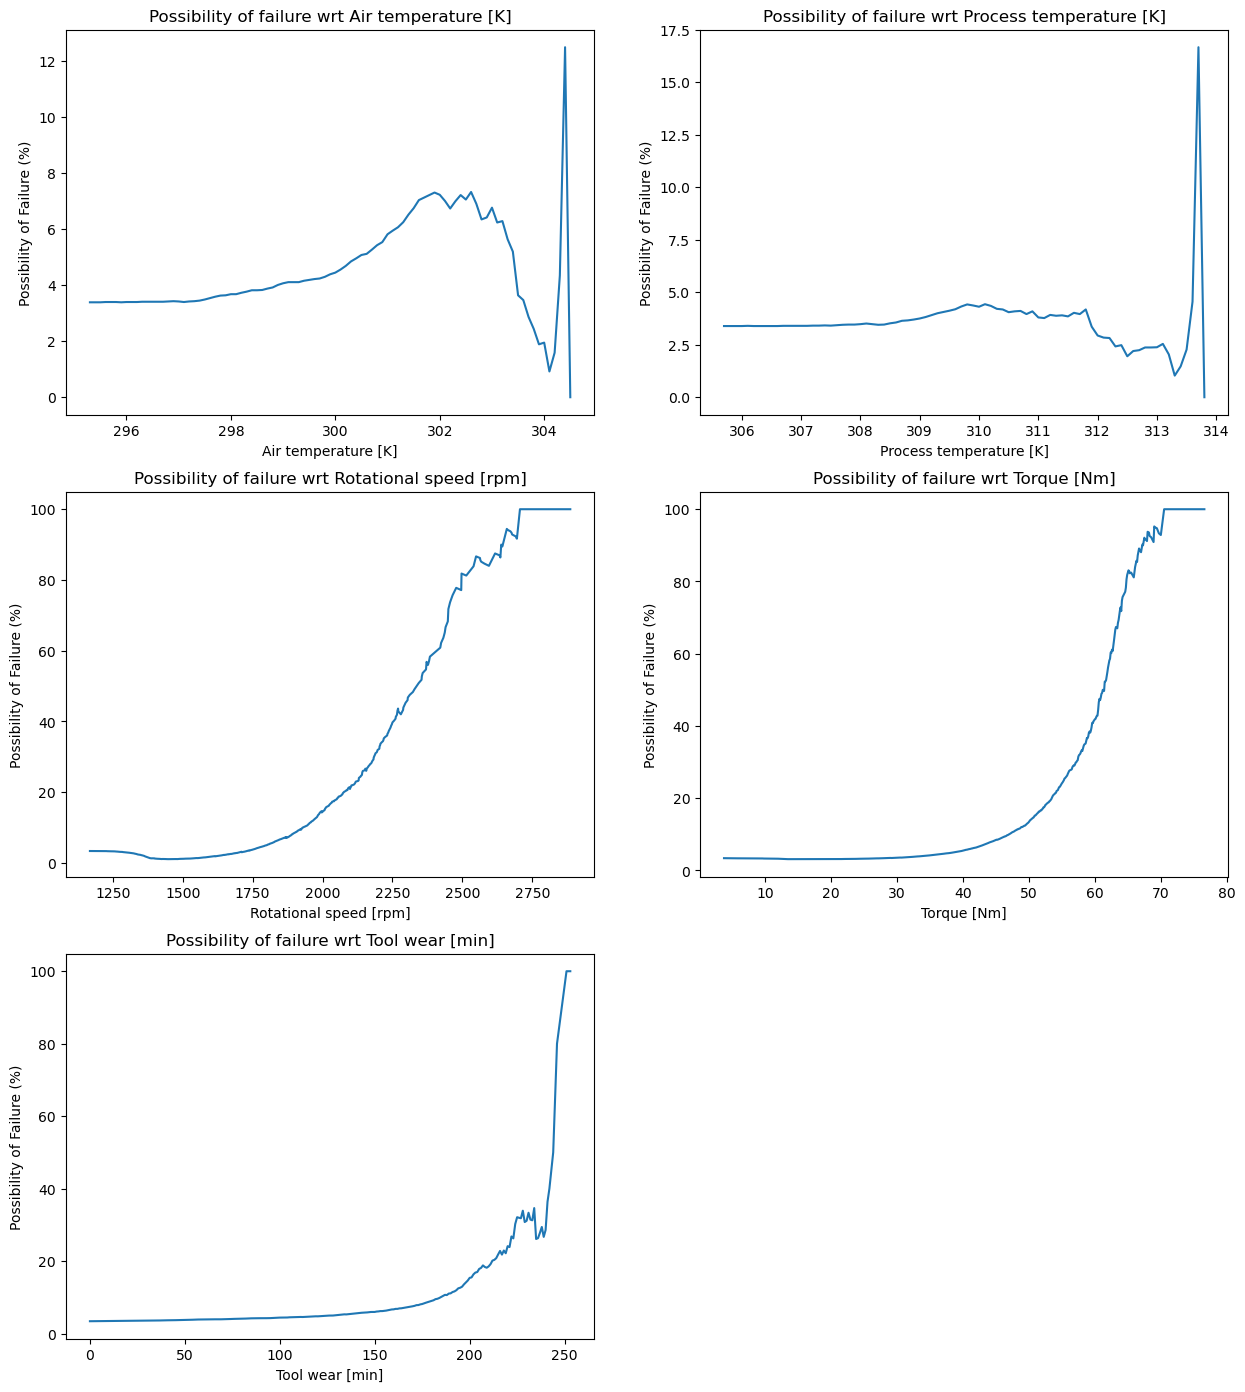

In [79]:
def feat_prob(feature,data):
    x,y = [],[]
    for j in data[feature].unique():
        temp = data
        temp = temp[temp[feature]>=j]
        y.append(round((temp.Target.mean()*100),2))
        x.append(j)
    return(x,y)

plt.figure(figsize=(15,17))
m=1
for i in lst:
    plt.subplot(3,2,m).set_title(label=("Possibility of failure wrt "+i))
    x,y = feat_prob(i,dataset)
    plt.xlabel(i)
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x)
    m+=1

# Failure chance by Tool Type vs Torque

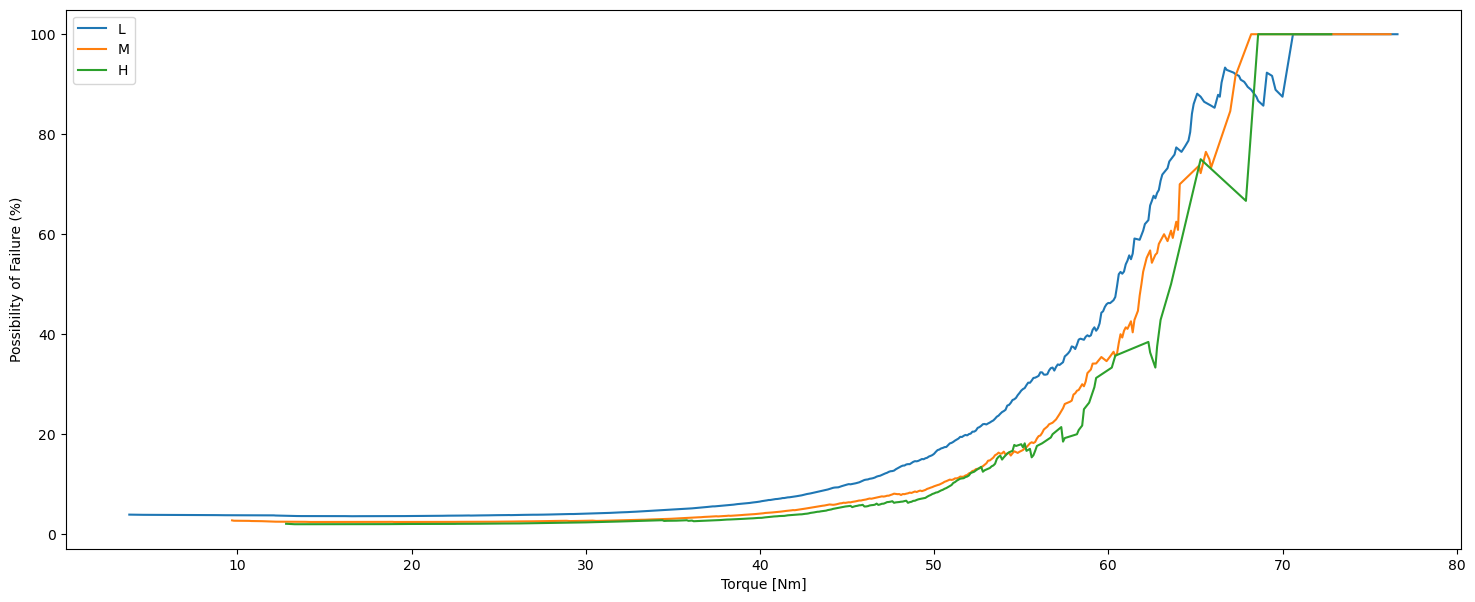

In [92]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(dataset[dataset['Type']==i])

for i in datasets :
    x,y = feat_prob("Torque [Nm]",i)
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["L","M","H"])

# Failure chance by Tool Type vs Rotational speed

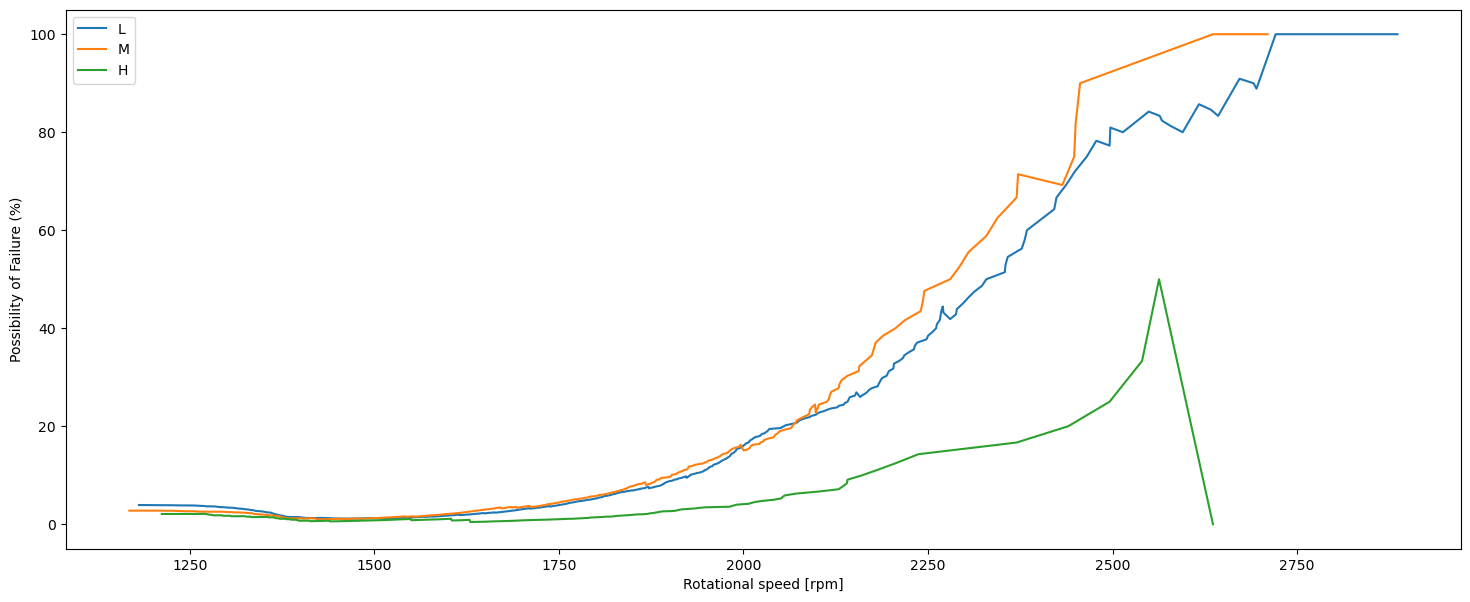

In [93]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(dataset[dataset['Type']==i])

for i in datasets :
    x,y = feat_prob("Rotational speed [rpm]",i)
    plt.xlabel("Rotational speed [rpm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["L","M","H"])

# Failure chance by Tool Type vs Wear Time

In [ ]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(data[data['Type']==i])

for i in datasets :
    x,y = feat_prob("Tool wear [min]",i)
    plt.xlabel("Tool wear [min]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["L","M","H"])

# Pre-Processing

In [94]:
#Encoding
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

lbl.fit(dataset['Type'])
dataset['Type'] = lbl.transform(dataset['Type'])

lbl.fit(dataset['Target'])
dataset['Target'] = lbl.transform(dataset['Target'])

In [97]:
dataset.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,No Failure
1,1,298.2,308.7,1408,46.3,3,0,No Failure
2,1,298.1,308.5,1498,49.4,5,0,No Failure
3,1,298.2,308.6,1433,39.5,7,0,No Failure
4,1,298.2,308.7,1408,40.0,9,0,No Failure
5,2,298.1,308.6,1425,41.9,11,0,No Failure
6,1,298.1,308.6,1558,42.4,14,0,No Failure
7,1,298.1,308.6,1527,40.2,16,0,No Failure
8,2,298.3,308.7,1667,28.6,18,0,No Failure
9,2,298.5,309.0,1741,28.0,21,0,No Failure


# Train Test SPlit

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [99]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['Failure Type','Target'],axis=1),
                                                    dataset['Target'], test_size=0.25, random_state=10)

In [100]:
len(X_train)

7500

In [101]:
len(X_test)

2500

In [103]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto', probability=True),
        'params': {
            'C': [1, 10, 20, 50],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [5, 10, 20, 30],
            'criterion': ['gini', 'entropy']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10, 20]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(algorithm='auto'),
        'params': {
            'n_neighbors': [1, 5, 10, 20],
        }
    }
}

# Training

In [104]:
scores = []
best_estimators = {}

for model_name, mp in model_params.items():

    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    best_estimators[model_name] = clf.best_estimator_

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\U

In [105]:
import pandas as pd
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [106]:
df

,model,best_score,best_params
0,svm,0.968933,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.981733,"{'criterion': 'gini', 'n_estimators': 30}"
2,logistic_regression,0.967733,{'C': 1}
3,KNN,0.969600,{'n_neighbors': 10}


In [108]:
best_clf = best_estimators['logistic_regression']

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2415,   10],
       [  56,   19]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

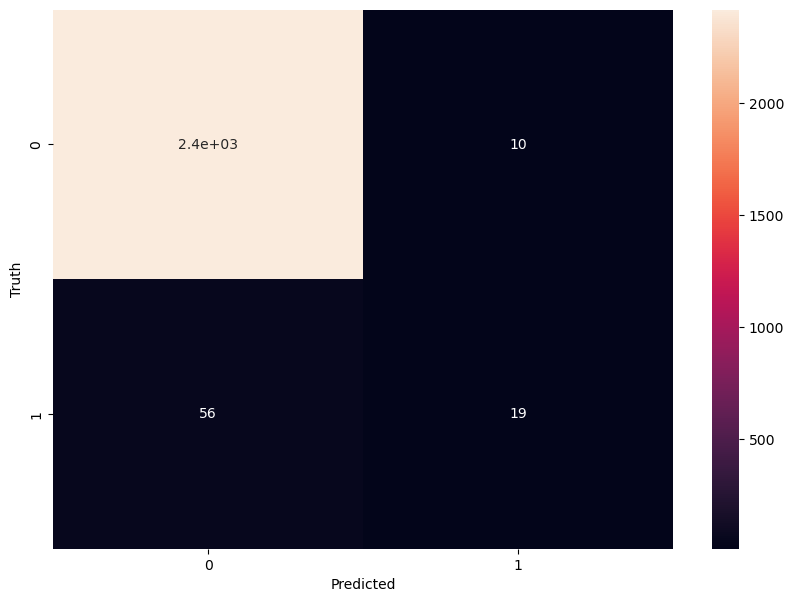

In [110]:
import seaborn as sns
plt.figure(figsize= (10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [111]:
import joblib
joblib.dump(best_clf,'failure_prediction.pkl')

['failure_prediction.pkl']

In [112]:
class_dict = {'0': "No Failure", '1': "Failure"}

import json
with open('class_dict', 'w') as f:
    f.write(json.dumps(class_dict))

In [117]:
best_clf.predict([[1, 298.9, 309.1, 2861, 4.6, 143]])

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([1], dtype=int64)

In [116]:
dataset[dataset['Failure Type'] != 'No Failure']

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,1,298.9,309.1,2861,4.6,143,1,Power Failure
69,1,298.9,309.0,1410,65.7,191,1,Power Failure
77,1,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,1,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,1,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...
9758,1,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,1,298.5,309.5,1294,66.7,12,1,Power Failure
9822,1,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,1,298.3,309.3,1337,56.1,206,1,Overstrain Failure
